In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
### Training LSTM for 5 years , Google Stock price , Based upon the paper made by stanford 

In [51]:
train = pd.read_csv('Google_Stock_Price_Train.csv')

In [52]:
train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [53]:
### Open price is label. 

In [54]:
### to make label into a 2d numpy array
label = train.iloc[:,1:2]

In [55]:
label.head()

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04


In [15]:
### Feature Scaling , Using Normalization for a better result
from sklearn.preprocessing import MinMaxScaler

In [16]:
sc = MinMaxScaler()

In [18]:
train = sc.fit_transform(label)

In [22]:
## all in 0's and 1's for RNN 
train

array([[ 0.08581368],
       [ 0.09701243],
       [ 0.09433366],
       ..., 
       [ 0.95725128],
       [ 0.93796041],
       [ 0.93688146]])

In [24]:
## for an lstm network t would be the train and validation shall be t+1 
x_train = train[0:1257]

In [25]:
y_train = train[1:1258]

In [26]:
x_train

array([[ 0.08581368],
       [ 0.09701243],
       [ 0.09433366],
       ..., 
       [ 0.95163331],
       [ 0.95725128],
       [ 0.93796041]])

In [27]:
y_train

array([[ 0.09701243],
       [ 0.09433366],
       [ 0.09156187],
       ..., 
       [ 0.95725128],
       [ 0.93796041],
       [ 0.93688146]])

The second price in x_train can be seen as the first price at y_Train

In [28]:
## for keras converting to 3d
x_train = np.reshape(x_train,(1257,1,1))

In [29]:
x_train

array([[[ 0.08581368]],

       [[ 0.09701243]],

       [[ 0.09433366]],

       ..., 
       [[ 0.95163331]],

       [[ 0.95725128]],

       [[ 0.93796041]]])

Converted to 3d array

In [31]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import tensorflow as tf
from keras.layers import Dense,LSTM
from keras.models import Sequential

In [35]:
reg = Sequential()

In [36]:
## Input layer
reg.add(LSTM(units =4,activation = 'sigmoid',input_shape = (None , 1)))

In [37]:
## Output layer
reg.add(Dense(units = 1,kernel_initializer='uniform'))

In [38]:
#compiling the rnn 
reg.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [41]:
reg.fit(x_train,y_train,batch_size=40,epochs=200)

Epoch 1/200
1257/1257 [==============================] - 0s - loss: 2.5001e-04     
Epoch 2/200
1257/1257 [==============================] - 0s - loss: 2.4804e-04     
Epoch 3/200
1257/1257 [==============================] - 0s - loss: 2.4891e-04     
Epoch 4/200
1257/1257 [==============================] - 0s - loss: 2.4807e-04     
Epoch 5/200
1257/1257 [==============================] - 0s - loss: 2.5060e-04     
Epoch 6/200
1257/1257 [==============================] - 0s - loss: 2.4779e-04     
Epoch 7/200
1257/1257 [==============================] - 0s - loss: 2.4760e-04     
Epoch 8/200
1257/1257 [==============================] - 0s - loss: 2.5495e-04     
Epoch 9/200
1257/1257 [==============================] - 0s - loss: 2.4964e-04     
Epoch 10/200
1257/1257 [==============================] - 0s - loss: 2.5233e-04     
Epoch 11/200
1257/1257 [==============================] - 0s - loss: 2.5204e-04     
Epoch 12/200
1257/1257 [==============================] - 0s - loss: 2.526

1257/1257 [==============================] - 0s - loss: 2.5154e-04     
Epoch 192/200
1257/1257 [==============================] - 0s - loss: 2.4863e-04     
Epoch 193/200
1257/1257 [==============================] - 0s - loss: 2.4646e-04     
Epoch 194/200
1257/1257 [==============================] - 0s - loss: 2.4790e-04     
Epoch 195/200
1257/1257 [==============================] - 0s - loss: 2.4938e-04     
Epoch 196/200
1257/1257 [==============================] - 0s - loss: 2.5186e-04     
Epoch 197/200
1257/1257 [==============================] - 0s - loss: 2.5062e-04     
Epoch 198/200
1257/1257 [==============================] - 0s - loss: 2.4624e-04     
Epoch 199/200
1257/1257 [==============================] - 0s - loss: 2.4871e-04     
Epoch 200/200
1257/1257 [==============================] - 0s - loss: 2.4633e-04     


In [42]:
test = pd.read_csv('Google_Stock_Price_Test.csv')

In [43]:
real_price = test.iloc[:,1:2].values

In [44]:
real_price

array([[ 778.81],
       [ 788.36],
       [ 786.08],
       [ 795.26],
       [ 806.4 ],
       [ 807.86],
       [ 805.  ],
       [ 807.14],
       [ 807.48],
       [ 807.08],
       [ 805.81],
       [ 805.12],
       [ 806.91],
       [ 807.25],
       [ 822.3 ],
       [ 829.62],
       [ 837.81],
       [ 834.71],
       [ 814.66],
       [ 796.86]])

In [56]:
inp = real_price
inp = sc.transform(inp)

In [57]:
inp = np.reshape(inp , (20,1,1))

In [58]:
pred = reg.predict(inp)

In [59]:
pred

array([[ 0.92690277],
       [ 0.94373703],
       [ 0.93971992],
       [ 0.95588648],
       [ 0.97547817],
       [ 0.97804356],
       [ 0.97301745],
       [ 0.97677851],
       [ 0.97737598],
       [ 0.97667313],
       [ 0.97444129],
       [ 0.97322845],
       [ 0.97637439],
       [ 0.97697175],
       [ 1.0033915 ],
       [ 1.01622319],
       [ 1.03056574],
       [ 1.02513862],
       [ 0.9899863 ],
       [ 0.95870221]], dtype=float32)

In [60]:
pred = sc.inverse_transform(pred)

In [61]:
pred

array([[ 777.38580322],
       [ 786.4352417 ],
       [ 784.27581787],
       [ 792.96630859],
       [ 803.49804688],
       [ 804.8770752 ],
       [ 802.17523193],
       [ 804.19702148],
       [ 804.51818848],
       [ 804.14038086],
       [ 802.94061279],
       [ 802.28863525],
       [ 803.97979736],
       [ 804.30090332],
       [ 818.50311279],
       [ 825.40093994],
       [ 833.11090088],
       [ 830.19348145],
       [ 811.29699707],
       [ 794.47991943]], dtype=float32)

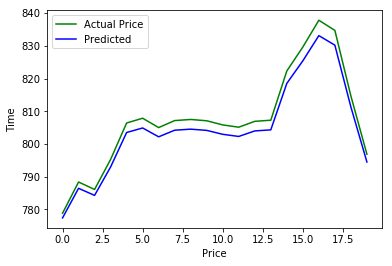

In [65]:
plt.plot(real_price,color = 'green',label = 'Actual Price')
plt.plot(pred,color = 'blue',label = 'Predicted')
plt.xlabel('Price')
plt.ylabel('Time')
plt.legend()
plt.show()

In [66]:
## Getting real train stock price 
realtrain = pd.read_csv('Google_Stock_Price_Train.csv')
realtrain = realtrain.iloc[:,1:2].values

In [67]:
predtrain = reg.predict(x_train)

In [68]:
predtrain = sc.inverse_transform(predtrain)

In [69]:
predtrain

array([[ 325.03289795],
       [ 330.91400146],
       [ 329.50332642],
       ..., 
       [ 788.63183594],
       [ 791.49029541],
       [ 781.67034912]], dtype=float32)

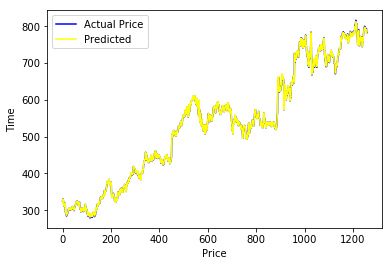

In [74]:
plt.plot(realtrain,color = 'blue',label = 'Actual Price')
plt.plot(predtrain,color = 'yellow',label = 'Predicted')
plt.xlabel('Price')
plt.ylabel('Time')
plt.legend()
plt.show()